<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex08_%EA%B0%9C%2C%EA%B3%A0%EC%96%91%EC%9D%B4_mlp%2Ccnn%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ex08_개,고양이_mlp,cnn실습.ipynb
# 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 딥러닝 폴더까지 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


### 목표
- mlp, cnn 모델을 활용하여 이미지 분류 실습을 진행해보자
- 개, 고양이 2개의 클래스를 분류하는 이진분류를 진행해보자
- 성능을 높이기 위한 노력을 진행해보자
  - 이미지 증식 : 이미지 개체수를 늘려서 학습시킴
  - 전이학습 : 사전에 학습이되어 성능이 좋은 분류 모델을 연결하여 사용해보자

In [ ]:
# 환경세팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# npz 파일 불러오기
# X_train,X_test,y_train,y_test 총 4 개 잘 가지고 있는지 확인
# np.load('경로설정')
data=np.load('./data/npz_cats_vs_dogs.npz')
type(data)

numpy.lib.npyio.NpzFile

In [ ]:
len(data)
# 각 변수에 나눠서 담아주기
X_train=data['X_train']
X_test=data['X_test']
y_train=data['y_train']
y_test=data['y_test']

# 크기확인
print('훈련셋:',X_train.shape,y_train.shape)
print('테스트셋:',X_test.shape,y_test.shape)

훈련셋: (2000, 224, 224, 3) (2000,)
테스트셋: (2000, 224, 224, 3) (1000,)


#### mlp 모델 생성
- mlp 기반 모델 설계
- complie : 학습 및 평가 방법 설정
- fit : 학습 및 학습 현황 시각화
- predict / evaluate

In [ ]:
# 이미지 데이터 다루기 위해서 필요한  tf 도구
# 2차원 => 1차원, 3차원 => 1차원 펴주는 기능 : Flatten()
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# 조기학습 중단 - 설정한 반복횟수만큼 다 학습할 필요가 없다고 생각되면 연결
# 성능향상이 없는데 계속 반복할 경우 과대적합 우려가 발생
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train[0].shape

(224, 224, 3)

In [ ]:
# 모델 설계
# 뼈대 구축
mlp_model=Sequential()

# 입력층
# 3차원 => 1차원 펴주는 기능
# 이미지 한장의 크기 :
mlp_model.add(Flatten(input_shape=(224,224,3)))

# 중간층
# 3개 (256, 128, 64)
mlp_model.add(Dense(256,activation='relu'))
mlp_model.add(Dense(128,activation='relu'))
mlp_model.add(Dense(64,activation='relu'))

# 출력층
# 이진분류 내용으로 설정
# units = 1, activation = 'sigmoid'
mlp_model.add(Dense(1,activation='sigmoid'))

# 모델 요약
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 38576641 (147.16 MB)
Trainable params: 38576641 (147.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# validation_data setting
# tarin_test_split using
# X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
#                                              test_size=0.3,
#                                              random_state=1)

In [ ]:
# 컴파일
mlp_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# 조기학습 중단
# 특정값을 기준으로 5 번 정도 값이 갱신이 되지 않는다면 학습 멈춤
# 특정값 => 검증데이터 정확도 기준
f_early=EarlyStopping('val_accuracy', # 멈추는 기준값
                      patience=5, # 성능 개선을 기다리는 횟수
                      verbose=1) # 조기학습 중단 메세지 출력

# 학습 코드까지 짜보기
# 50 반복횟수
# 검증데이터 연결하는 키워드 :
# 1. validation_split = 0.3 (30%) , 2. validation_data = (검증문제, 검증답)
# 조기학습 중단 연결
mlp_his=mlp_model.fit(X_train,y_train,
                      validation_split=0.3,
                      # validation_data=(X_val,y_val),
                      epochs=50,
                      callbacks=[f_early])

Epoch 1/50
44/44 [==============================] - 7s 24ms/step - loss: 2006.3007 - accuracy: 0.6171 - val_loss: 9.4300 - val_accuracy: 0.9750
Epoch 2/50
44/44 [==============================] - 1s 14ms/step - loss: 1215.9590 - accuracy: 0.6171 - val_loss: 1697.7106 - val_accuracy: 0.0000e+00
Epoch 3/50
44/44 [==============================] - 1s 15ms/step - loss: 664.4294 - accuracy: 0.6000 - val_loss: 563.9814 - val_accuracy: 0.1650
Epoch 4/50
44/44 [==============================] - 1s 15ms/step - loss: 317.4059 - accuracy: 0.6464 - val_loss: 146.1438 - val_accuracy: 0.5133
Epoch 5/50
44/44 [==============================] - 1s 16ms/step - loss: 203.9350 - accuracy: 0.6557 - val_loss: 102.2943 - val_accuracy: 0.5917
Epoch 6/50
44/44 [==============================] - 1s 17ms/step - loss: 278.9867 - accuracy: 0.6479 - val_loss: 3.6511 - val_accuracy: 0.9800
Epoch 7/50
44/44 [==============================] - 1s 17ms/step - loss: 596.7445 - accuracy: 0.6186 - val_loss: 186.0370 - val

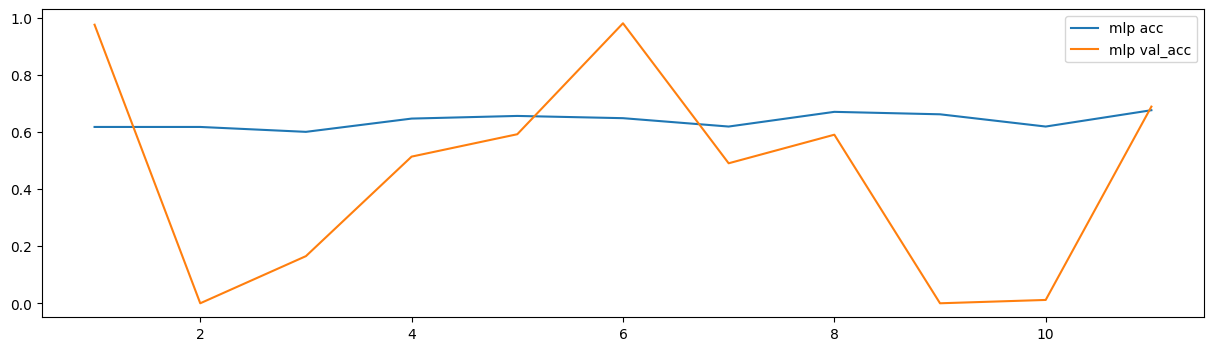

In [ ]:
# val_accuracy, accuracy 선 그래프 시각화
# x축 반복횟수, y축 val_accuracy, accuracy
plt.figure(figsize=(15,4))
x_range=len(mlp_his.history['accuracy'])
plt.plot(range(1,x_range+1),mlp_his.history['accuracy'],label='mlp acc')
plt.plot(range(1,x_range+1),mlp_his.history['val_accuracy'],label='mlp val_acc')
plt.legend()
plt.show()

In [ ]:
# 복잡한 데이터에 비해 모델은 너무 단순한 상태
# 일반 다층 퍼셋트론 모델은 복잡한 이미지에 대한 학습 성능이 떨어짐
# 복잡한 이미지에 대해, 그 안의 특성값에 대해 잘 학습할 수 있는 도구가 없을까?

#### CNN 모델 생성
  - 1. 모델 설계
    - 뼈대 구축
    - 특성 추출부 (합성곱 Conv2D, Pooling2D)
    - 분류부 (전결합층, 완전연결층, mlp(이진분류))
  - 2. 모델 컴파일 : 학습 / 평가 방법 설정
  - 3. 모델 학습 및 시각화
  - 4. 모델 예측 및 평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# 조기학습중단, 최적모델저장
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# 모델 생성
cnn_model=Sequential() # 뼈대

# 특성추출부 => 합성곱층 연결 : 주요 대상에 집중! => 중요한 특징을 추출 => 추출
# 입력에 내용 연결
# 필터 (커널, 마스크, 돋보기) 개수, 필터 크기,
# 활성화 함수, 패딩 (연산 후 결과 이미지 크기 설정), 스트라이드 (이동간격)
# 최대풀링 : 지역 내에서 더 중요한 값만 추출하자!
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),
                     padding='same',input_shape=(224,224,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # pool_size : 특정 지역에 접근하는 크기
# 데이터 안의 대상이 미묘하게 위치가 바뀌어도 지역내의 최댓값은 동일하게 추출
# => 위치의 영향을 적게 받음
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# 전결합층 (완전연결층,mlp) => 분류부
# 1차원 받아들일 수 있음 => Flatten
cnn_model.add(Flatten())
# 중간층 : conv 주요 특성 추출 => 중간층 1 ~ 2 층 정도로 얕게 쌓아줌
cnn_model.add(Dense(256,activation='relu'))
# 출력층 (이진분류)
cnn_model.add(Dense(1,activation='sigmoid'))
# 모델 정보 요약
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 128)      

In [ ]:
import os
# 컴파일
cnn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# 조기학습중단
f_early=EarlyStopping(monitor='val_accuracy',
                      patience=5,
                      verbose=1)
# 최적의 모델 찾아서 저장 (모델체크포인트)
# 모델 저장될 경로, 파일명 설정
model_dir='./model/'

if not os.path.exists(model_dir):
  # 폴더 x, 해당 폴더를 생성
  os.mkdir(model_dir)

# 파일명을 설정할 때 형식 정해져있음
# 정규식 표현법 {변수명:출력형태}
# {epoch:03:d}: 반복횟수 변수 값을 가져와서 정수형 3 자리로 표현
# 3 자리보다 작으면 왼쪽부터 0 으로 채움 : 3 => 003
# {val_accuracy:.2f}: 소숫점 2 자리까지 표시 (0.576541 => 0.58)
# 'cat_vs_dog_model_001_0.58.hdf5
file_path=model_dir+'cat_vs_dog_model_{epoch:03d}_{val_accuracy:.2f}.hdf5'

# monitor = 'val_accuracy' : 검증 정확도를 기준으로 확인하면서 저장할 것
# save_best_only=True : 이전 모델보다 더 나은 모델일 경우 저장할 것
# verbose=1 : 저장되는 현황을 출력할 것
f_mckp=ModelCheckpoint(filepath=file_path,
                       monitor='val_accuracy',
                       verbose=1,
                       save_best_only=True)

In [ ]:
# 학습
# 50 반복
# 검증 데이터 20%
# callback => 조기학습중단, 모델 체크포인트
cnn_his=cnn_model.fit(X_train,y_train,
                      validation_split=0.2,
                      epochs=50,
                      callbacks=[f_early,f_mckp])

Epoch 1/50
49/50 [============================>.] - ETA: 0s - loss: 114.7156 - accuracy: 0.5912
Epoch 1: val_accuracy improved from -inf to 0.07500, saving model to ./model/cat_vs_dog_model_001_0.08.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 12s 92ms/step - loss: 112.4354 - accuracy: 0.5888 - val_loss: 0.7716 - val_accuracy: 0.0750
Epoch 2/50
49/50 [============================>.] - ETA: 0s - loss: 0.6370 - accuracy: 0.6473
Epoch 2: val_accuracy improved from 0.07500 to 0.09750, saving model to ./model/cat_vs_dog_model_002_0.10.hdf5
50/50 [==============================] - 4s 72ms/step - loss: 0.6357 - accuracy: 0.6481 - val_loss: 1.1135 - val_accuracy: 0.0975
Epoch 3/50
49/50 [============================>.] - ETA: 0s - loss: 0.5758 - accuracy: 0.6849
Epoch 3: val_accuracy improved from 0.09750 to 0.16750, saving model to ./model/cat_vs_dog_model_003_0.17.hdf5
50/50 [==============================] - 4s 76ms/step - loss: 0.5762 - accuracy: 0.6844 - val_loss: 1.3480 - val_accuracy: 0.1675
Epoch 4/50
49/50 [============================>.] - ETA: 0s - loss: 0.4594 - accuracy: 0.7710
Epoch 4: val_accuracy improved from 0.16750 to 0.42000, saving model to ./model/cat_vs_dog_model_004_0.

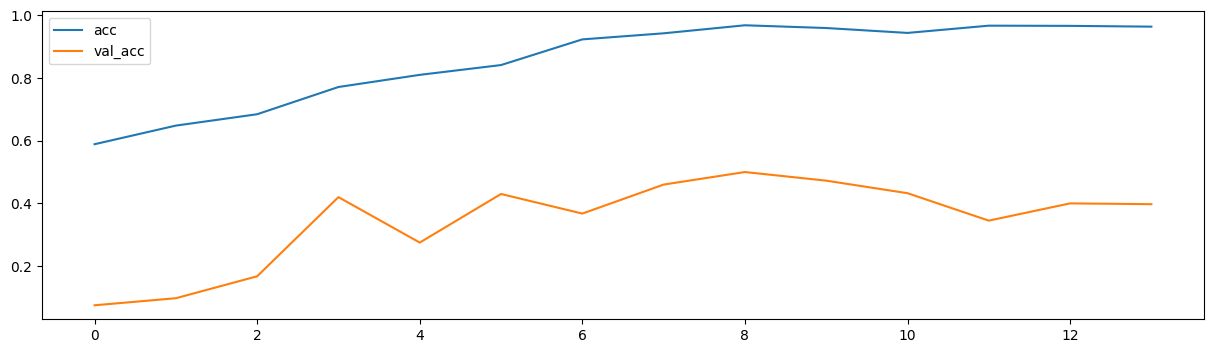

In [ ]:
# 선그래프로 val_acc, acc 시각화 해보기
# cnn_his.history
# plt.plot(y 값 설정, 라벨)
# plt.plot(y 값 설정, 라벨)
# 범례출력
# 그래프 출력
plt.figure(figsize=(15,4))
plt.plot(cnn_his.history['accuracy'],label='acc')
plt.plot(cnn_his.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

# 기존의 mlp 모델보다는 cnn 모델이 데이터를 잘 파악하고 있음
# 비교적 train 성능 높은데, val 성능이 떨어지는 과대적합 현상이 보여짐
# 데이터가 여전히 복잡한데 비해서, 모델은 상대적으로 단순할 수 있음
# 과대적합을 어떻게 하면 해결할 수 있을까?
# 데이터를 늘려서 학습시키면 과대적합이 해소되지 않을까? 데이터 증식!

#### 데이터 증식을 통한 cnn 모델 성능 개선
  - tensorflow 의 ImageDataGenerator 도구를 활용해보자
  - ImageDataGenerator 여러 설정값에 대해 이해해보자
  - 사용할 데이터 : npz x, 실제 이미지 파일 연결 => filtered / train, test 실제 이미지 경로 연결

In [ ]:
# 필요한 도구 불러오기
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 이미지 증식 도구
# Dropout : 과대적합 제어하는 도구
from tensorflow.keras.layers import Dropout

In [ ]:
# 증식할 데이터 경로 설정
# 학습하는 데이터 개수 늘려야함 => 증식 대상 train
# test 0 ~ 255 정보 설정 => 스케일조정 (0 ~ 1) : 증식 대상 x
train_dir='./data/cats_and_dogs_filtered/train'
test_dir='./data/cats_and_dogs_filtered/test'

# 변형 형식 설정
# 축소, 확대, 수평 이동, 수평 뒤집기, 수직 이동, 수직 뒤집기 등등
# 0 ~ 255 => 0 ~ 1 (데이터 숫자의 분산을 줄임)
train_gen=ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True)
# test => 스케일링
test_gen=ImageDataGenerator(rescale=1./255)
# 테스트 데이터는 학습에 영향을 주지 않기 때문에 증식 시키지 않음

In [ ]:
# 데이터와 변형 설정 부분 연결하기
train_generator=train_gen.flow_from_directory(train_dir,
                                         target_size=(224,224),
                                         batch_size=10,
                                         class_mode='binary')
# 이진분류 설정 연결 => 라벨번호 0 번부터 시작, 폴더는 알파벳 순서로 확인
# cats : 0 , dogs : 1
test_generator=test_gen.flow_from_directory(test_dir,
                                         target_size=(224,224),
                                         batch_size=10,
                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# cnn 모델 2 생성
# ctrl + shift + l (엘) : 같은단어 모두 선택
cnn_model2=Sequential() # 뼈대

# 특성추출부 => 합성곱층 연결 : 주요 대상에 집중! => 중요한 특징을 추출 => 추출
# 입력에 내용 연결
# 필터 (커널, 마스크, 돋보기) 개수, 필터 크기,
# 활성화 함수, 패딩 (연산 후 결과 이미지 크기 설정), 스트라이드 (이동간격)
# 최대풀링 : 지역 내에서 더 중요한 값만 추출하자!
cnn_model2.add(Conv2D(filters=32,kernel_size=(3,3),
                     padding='same',input_shape=(224,224,3),activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2,2))) # pool_size : 특정 지역에 접근하는 크기
# 데이터 안의 대상이 미묘하게 위치가 바뀌어도 지역내의 최댓값은 동일하게 추출
# => 위치의 영향을 적게 받음
cnn_model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model2.add(Dropout(0.2)) # 뉴런 20% 비활성화, 20% 만큼 제외하고 학습
cnn_model2.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))

# 전결합층 (완전연결층,mlp) => 분류부
# 1차원 받아들일 수 있음 => Flatten
cnn_model2.add(Flatten())
# 중간층 : conv 주요 특성 추출 => 중간층 1 ~ 2 층 정도로 얕게 쌓아줌
cnn_model2.add(Dense(256,activation='relu'))
cnn_model2.add(Dropout(0.2)) # 20% 특성은 제외(랜덤하게 비활성화)하고 학습
# 출력층 (이진분류)
cnn_model2.add(Dense(1,activation='sigmoid'))
# 모델 정보 요약
cnn_model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 128)      

In [ ]:
# cnn_model2 컴파일
cnn_model2.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# fit 증식할 이미지를 학습할 때 연결
# 증식 + 학습 : fit_generator()
# 이미지 증식을 하고 학습 진행할 경우, 학습 현황이 들쭉날쭉한 경향이 있음
# 조기학습 x
# 반복횟수를 크게 설정하는 경우가 많음
# 검증용 데이터를 test 데이터로 활용
cnn_his2=cnn_model2.fit_generator(generator=train_generator,
                                  validation_data=test_generator,
                                  epochs=20)

<ipython-input-42-341c65dd3c57>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_his2=cnn_model2.fit_generator(generator=train_generator,


Epoch 1/20
200/200 [==============================] - 1311s 7s/step - loss: 0.8520 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
200/200 [==============================] - 37s 186ms/step - loss: 0.6884 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
200/200 [==============================] - 35s 175ms/step - loss: 0.6963 - accuracy: 0.5135 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
200/200 [==============================] - 39s 193ms/step - loss: 0.6936 - accuracy: 0.4975 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/20
200/200 [==============================] - 37s 185ms/step - loss: 0.7019 - accuracy: 0.5060 - val_loss: 0.6928 - val_accuracy: 0.5130
Epoch 6/20
200/200 [==============================] - 35s 173ms/step - loss: 0.6975 - accuracy: 0.4815 - val_loss: 0.6929 - val_accuracy: 0.5040
Epoch 7/20
200/200 [==============================] - 35s 175ms/step - loss: 0.6942 - accuracy: 0.4735 - val_loss: 0.6926 - val_acc

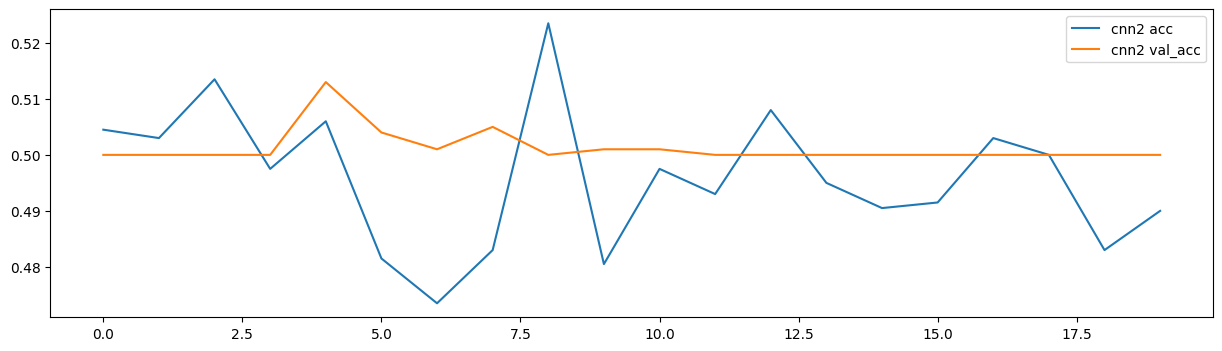

In [ ]:
# 선그래프로 val_acc, acc 시각화 해보기
# cnn_his.history
# plt.plot(y 값 설정, 라벨)
# plt.plot(y 값 설정, 라벨)
# 범례출력
# 그래프 출력
plt.figure(figsize=(15,4))
plt.plot(cnn_his2.history['accuracy'],label='cnn2 acc')
plt.plot(cnn_his2.history['val_accuracy'],label='cnn2 val_acc')
plt.legend()
plt.show()

In [ ]:
# 이미지 증식을 통해 과대적합 해소된 것을 확인할 수 있음
# 이미지 증식으로 모델 성능 개선 가능
# 이미지 증식으로 성능 개선하는 방법의 단점은 학습시간이 오래걸림

#### 전이학습
  - 다른 사람이 만들어 놓은 모델을 사용해보자! (전이학습) > 학습 빠르게 수행, 이미 학습된 데이터에 대해 특징을 효율적으로 추출할 수 있음 > 학습할 데이터에 대해 특징을 추출하는 시간이 필요없게 됨 (시간 단축)
  - 작은 용량의 데이터셋에 대해 학습할 때 과대적합을 예방 > 미세조정을 하게되면 학습할 가중치가 줄어 과하게 학습이 진행되지 않음
  - 완전히 똑같은 데이터로 학습 x , 비슷한 분류 문제를 푼 모델을 가져와서 사용하는 것 (클래스 레이블이 조금은 다를 수 있음)
  - 현재 우리 목표 : 개 vs 고양이
  - 전이학습 모델 : 사자 vs 호랑이 vs 코끼리
  - 분류하는 대상은 다르지만 판단하는 기준이 비슷할 수 있어서 사전학습 모델을 가져와서 활용하게 됨
  - 다른 사람이 만든 모델, 이미 학습된 모델 : 사전학습 모델 (Pretrained model)

In [ ]:
# vgg16 사전학습 모델 활용
# tensorflow => vgg16
# python => vgg16
from tensorflow.keras.applications import VGG16 # 이미지 인식 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
X_train[0].shape
# 행 224, 열 224, 색상 3 (컬러)

(224, 224, 3)

In [ ]:
vgg16=VGG16(include_top=False,
            weights='imagenet',
            input_shape=(224,224,3))
# top : 분류기층 (mlp), False : vgg16 모델이 가지고 있는 다중분류기 사용 x
# weights = 'imagenet' : imagenet 경진대회 데이터를 보며 학습한 모델의 가중치 값 활용
# input_shape : 앞으로 활용할 데이터의 크기 연결 (커스텀 데이터 크기)

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# vgg16 이 가지고 있는 Conv 층만 가져온 상황
# Conv 층이 개, 고양이 데이터를 입력받았을 때
# 학습하지 못하게 w 값을 동결시켜야 함
# 학습시 가중치가 갱신되어 버리면, 기존에 학습된 내용이 훼손
# 즉, 사전학습 모델을 활용하는 효과를 잃어버림
vgg16.trainable=False

In [ ]:
# 모델 설계
# 1. 뼈대구축
# 2. vgg16 conv 층 연결 => 특성 추출부 활용
# 3. mlp 층 (이진분류) => 분류부 설계
transfer_model=Sequential()
transfer_model.add(vgg16)

# 분류기층 >> mlp (이진분류 : 개 vs 고양이)
transfer_model.add(Flatten())
transfer_model.add(Dense(64,activation='relu'))
transfer_model.add(Dense(1,activation='sigmoid'))

transfer_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1605696   
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16320449 (62.26 MB)
Trainable params: 1605761 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# 컴파일 => 이진분류
transfer_model.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuarcy'])

In [ ]:
transfer_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1605696   
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16320449 (62.26 MB)
Trainable params: 1605761 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# 학습하기 전에 미세 조정 설정
# 모든 학습 x , mlp 층과 가까운 마지막 층 부터 학습이 가능하게 설정 o
# for layer in vgg16.layers:
#   # print(layer.name)
#   if layer.name=='block5_conv3':
#     layer.trainable=True # 해당 층만 동결을 품
#   else:
#     layer.trainable=False # 나머지 층은 그대로 동결

# 학습
# 검증 데이터 30%
# npz >> X_train,y_train
# 반복횟수 10
vgg_his=transfer_model.fit(X_train,y_train,
                   validation_split=0.3,
                   epochs=10)

Epoch 1/10
44/44 [==============================] - 8s 178ms/step - loss: 0.0457 - accuracy: 0.9900 - val_loss: 0.8111 - val_accuracy: 0.9383
Epoch 2/10
44/44 [==============================] - 8s 186ms/step - loss: 0.0286 - accuracy: 0.9971 - val_loss: 0.3765 - val_accuracy: 0.9617
Epoch 3/10
44/44 [==============================] - 8s 191ms/step - loss: 0.0098 - accuracy: 0.9964 - val_loss: 0.6526 - val_accuracy: 0.9483
Epoch 4/10
44/44 [==============================] - 8s 193ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 1.0139 - val_accuracy: 0.9383
Epoch 5/10
44/44 [==============================] - 11s 257ms/step - loss: 7.6941e-06 - accuracy: 1.0000 - val_loss: 0.9811 - val_accuracy: 0.9400
Epoch 6/10
44/44 [==============================] - 9s 195ms/step - loss: 5.2056e-06 - accuracy: 1.0000 - val_loss: 0.9881 - val_accuracy: 0.9400
Epoch 7/10
44/44 [==============================] - 8s 192ms/step - loss: 3.8097e-06 - accuracy: 1.0000 - val_loss: 0.9916 - val_accuracy: 

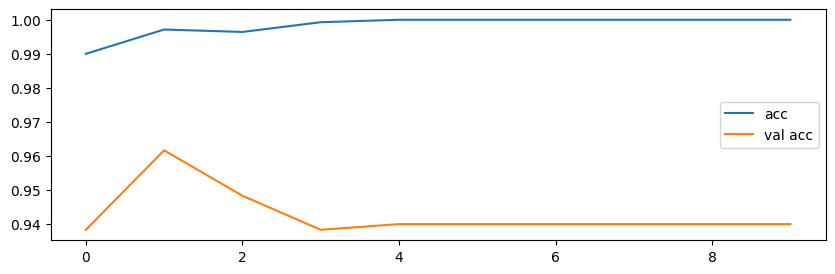

In [ ]:
# vgg_his
# acc, val_acc 시각화
plt.figure(figsize=(10,3))
acc=vgg_his.history['accuracy']
val_acc=vgg_his.history['val_accuracy']
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val acc')
plt.legend()
plt.show()

# cnn 모델 설계 변경하면서 다시 학습하고 과정 필요
# 전이학습 하게되면 cnn 모델 설계 변경할 필요, 학습시간이 많이 걸리지 않고
# 좋은 성능을 뽑아낼 수 있음